# Problem Statement:

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban, and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

To automate this process, they have given a problem to identify the customers’ segments, those are eligible for loan amount so that they can specifically target these customers. The goal of this project is to predict whether a loan would be approved or not.

# Importing Libraries

In [1]:
import pandas as pd                       # for reading the files
import numpy as np                        # for creating multi-dimensional-array
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for data visulization
import warnings  
from statistics import mean 
from sklearn import tree
from sklearn import metrics# for ignoring the warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import classification_report
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Import the Data Files

In [2]:
test= pd.read_csv('test.csv')
train= pd.read_csv('train.csv')

Test File

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.shape

(367, 12)

Training File

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

Creating a copy of file so that any changes made doesn't affect the original datasets

In [7]:
test_original= test.copy()
train_original= train.copy()

Checking the Data Types of Variables

In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant Analysis
(Examing each variable individually)

1. Target Variable i.e. 'Loan Status'

In [10]:
train['Loan_Status'].value_counts()                    #counting the values of different Loan Status

Y    422
N    192
Name: Loan_Status, dtype: int64

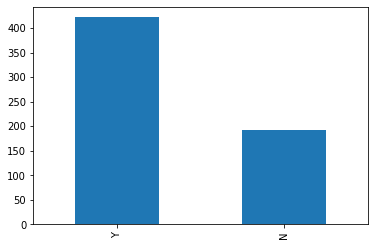

In [11]:
train['Loan_Status'].value_counts().plot.bar()         

Text(0.5, 1.0, 'Loan Status')

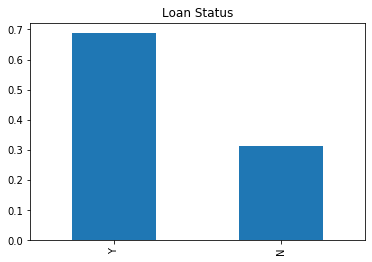

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()
# normalize = True will give the probability in y-axis

plt.title("Loan Status")

Plots for Independent Categorical Variables

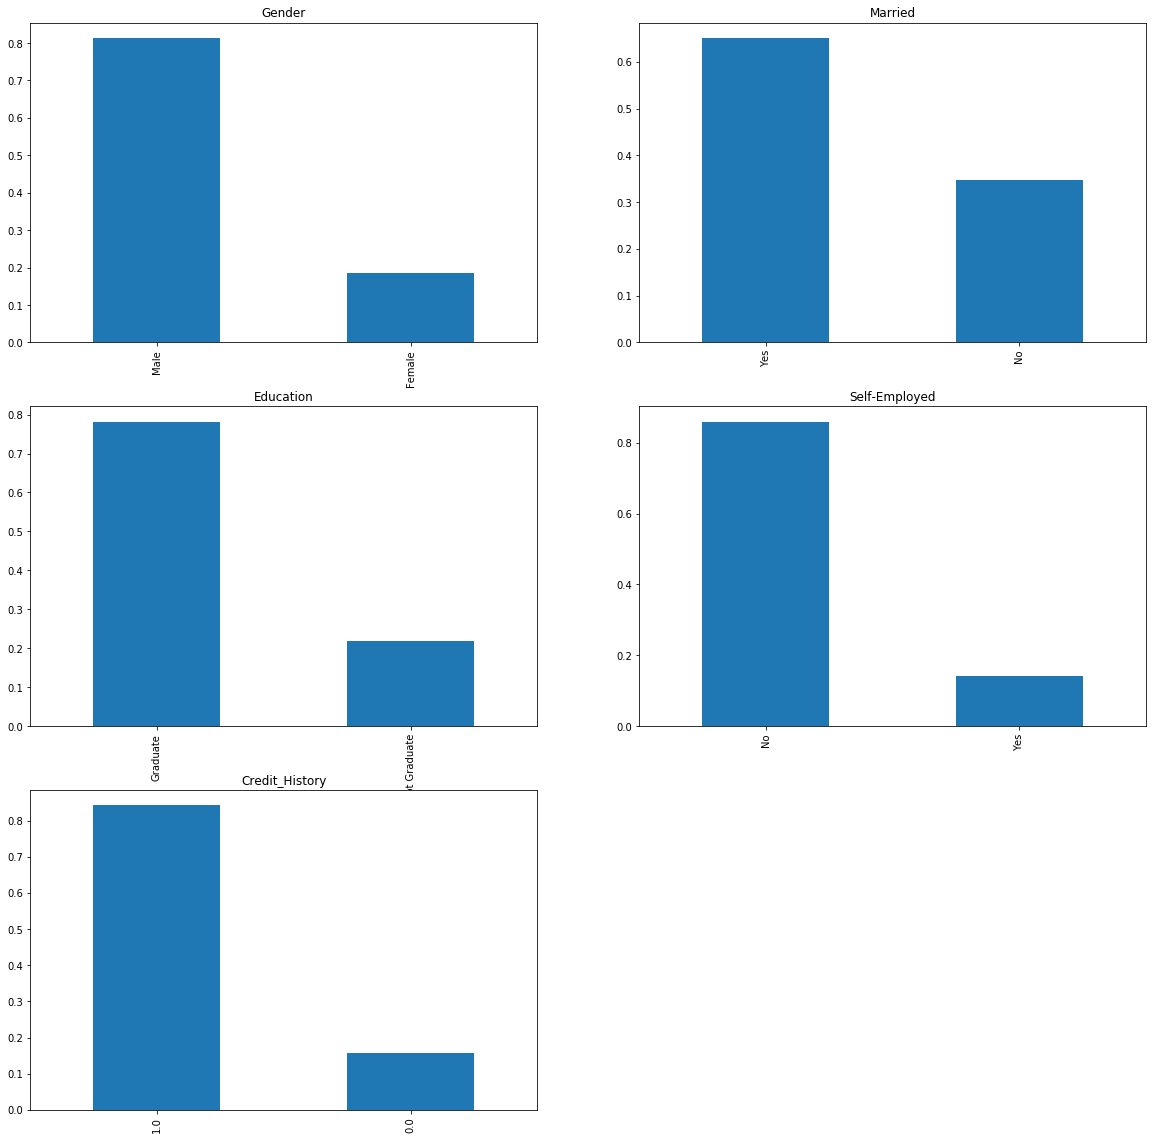

In [13]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History')

It can be inferred from the above bar plots that:

•	80% applicant in the dataset are male.

•	Around 65% of the applicants in the dataset are married.

•	Around 15% of the applicants in the dataset are self-employed.

•	Around 85% applicants have repaid their debts.


Plots for Independent Ordinal Variables

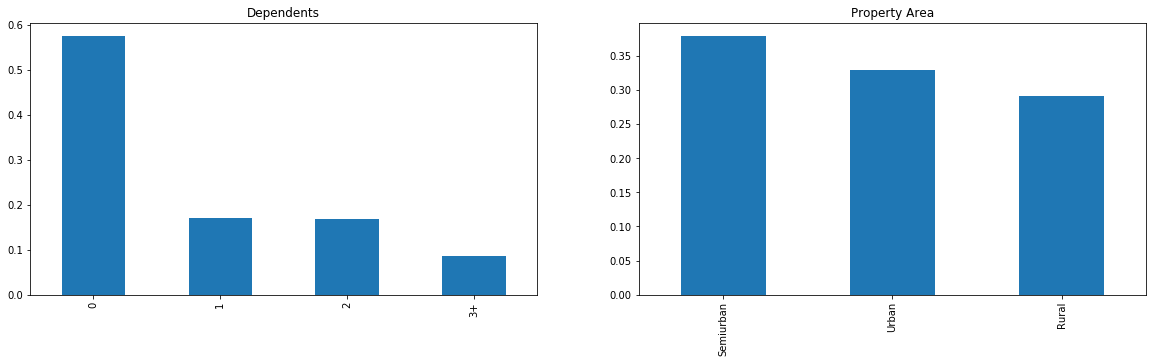

In [14]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area')

 Following inferences can be made from the above bar plots:
 
•	Most of the applicant do not have any dependents.

•	Around 80% of the applicants are graduates.

•	Most of the applicant are from Semiurban area.


Plots for Independent Numerical Variables

Applicant Income

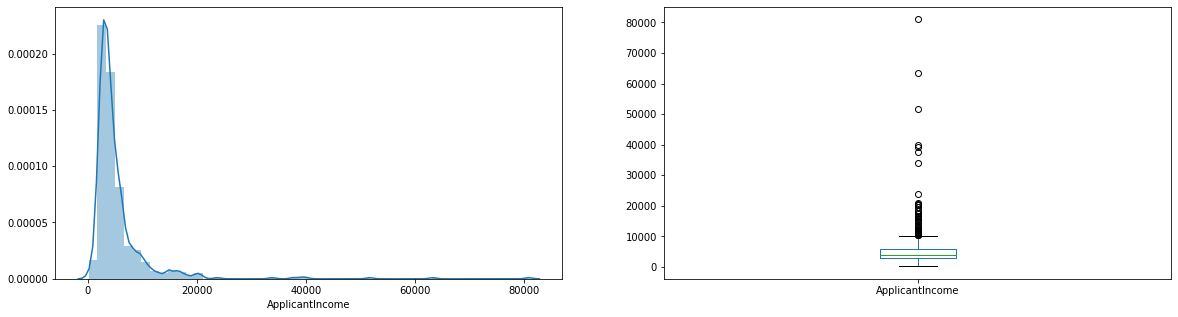

In [15]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

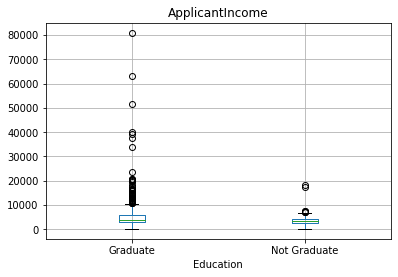

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

It can be inferred that most of the data in the distribution of applicant income is towards left which is not normally distributed, and the boxplot confirms the presence of a lot of extreme values/outliers. This can be attributed to the income disparity in the society. 

Co-applicant Income

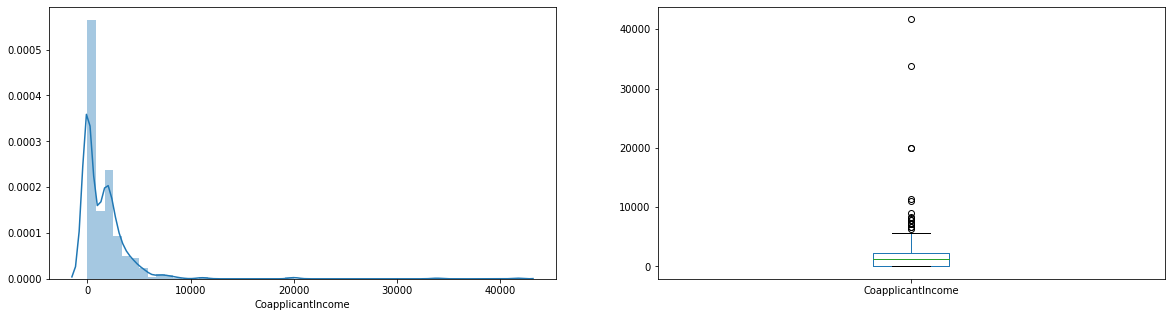

In [17]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

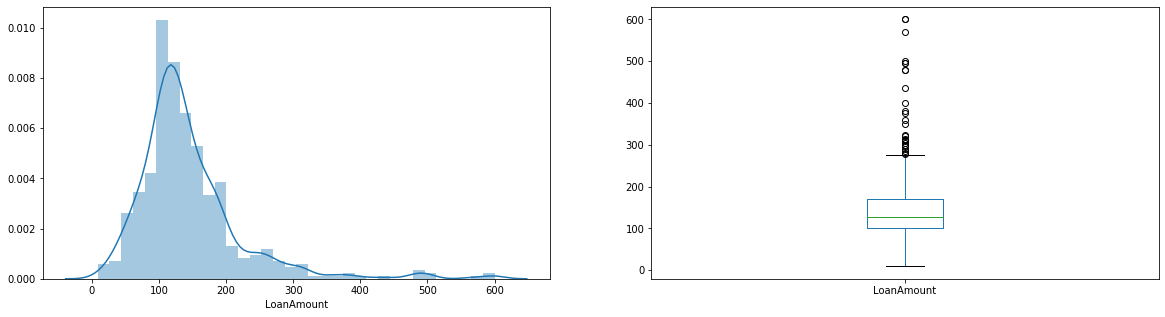

In [18]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))

# Bivariant Analysis
(Examing two variables at a time)

Frequency Table for Gender and Loan Status

In [19]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


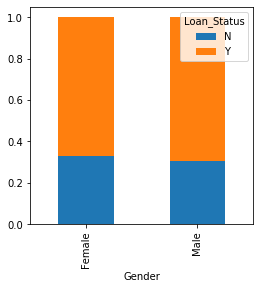

In [20]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Married and Loan Status

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


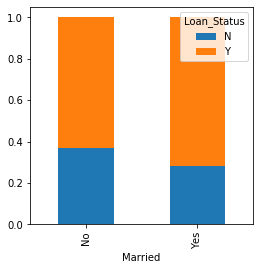

In [22]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Dependents and Loan Status

In [23]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


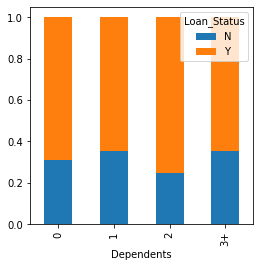

In [24]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Education and Loan Status

In [25]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


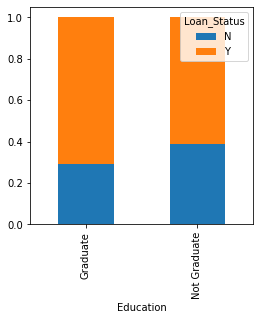

In [26]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )

Frequency Table for Self Employed and Loan Status

In [27]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


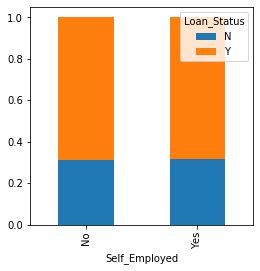

In [28]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Frequency Table for Credit History and Loan Status

In [29]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


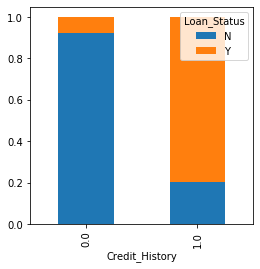

In [30]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Frequency Table for Property Area and Loan Status

In [31]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


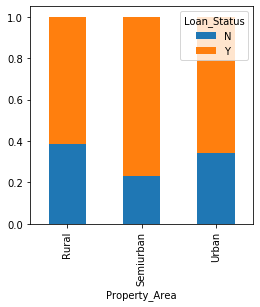

In [32]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Plotting of Numerical Categorical Variable and Loan Status

In [33]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

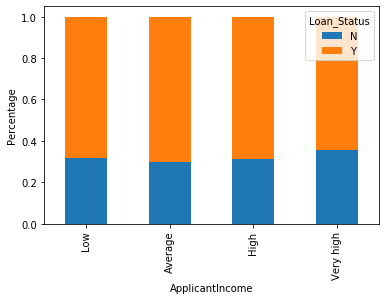

In [34]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

Doing the same for Coapplicant Income

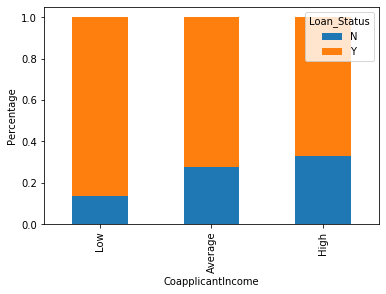

In [35]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

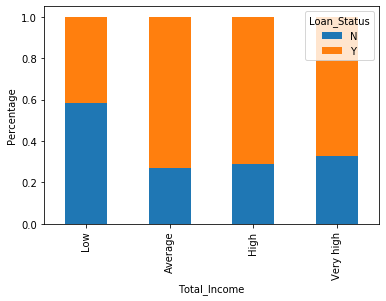

In [36]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Plotting of Loan Amount and Loan Status

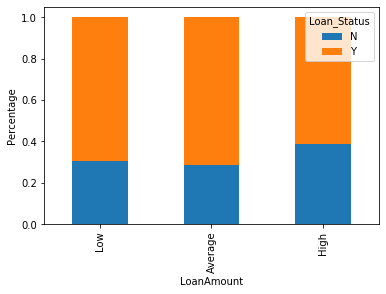

In [37]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


Change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 

In [38]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

Convert the target variable 'Loan Status' categories into 0 and 1 for logistic regression

In [39]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Following inferences can be made from the above bar plots:

•	It seems people with credit history as 1 are more likely to get the loans approved.

•	Proportion of loans getting approved in semi-urban area is higher than as compared to that in rural and urban areas.

•	Proportion of married applicants is higher for the approved loans.

•	Ratio of male and female applicants is more or less same for both approved and unapproved loans.


# Correlation using Heatmaps

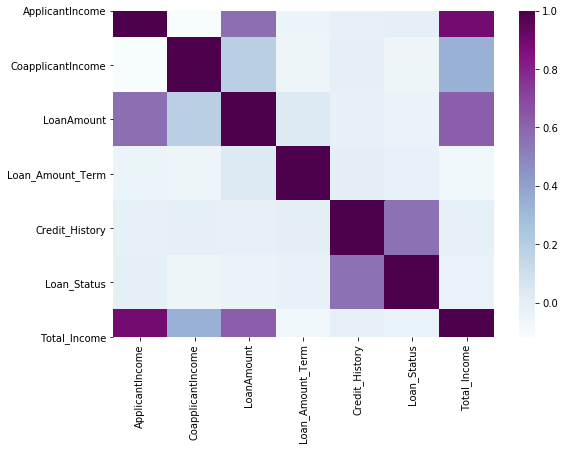

In [40]:
matrix = train.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu")

We see that the most correlated variables are (Applicant Income – Loan Amount) and (Credit_History – Loan Status).

LoanAmount is also correlated with CoapplicantIncome.


In [41]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [42]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Handling the missing Data

Checking the number of null values

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term.
So replacing the null values with the mode of the respective colums so that the values does not affect the result.

In [44]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [45]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [46]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [47]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [48]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [49]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [50]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [51]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [52]:
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [53]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [54]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [55]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [56]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [57]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

There are many outliers in the LoanAmount.Doing the log transformation to make the distribution look normal.

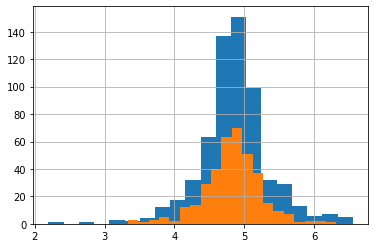

In [58]:

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

Now the distribution for LoanAmount looks much closer to normal and effect of extreme values has been significantly subsided. 

The Model Building Steps are done in the "Model Building.ipynb" notebook.